t for proportions?
-
Some of the hypothesis tests in this course have used a 
 test statistic and some have used a 
 test statistic. To get the correct p-value, you need to use the right type of test statistic.

Do tests of proportion(s) use a 
 or a 
 test statistic and why?

Yes. The t-test is needed for tests of mean(s) since you are estimating two unknown quantities, which leads to more variability.

Test for single proportions
-
In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

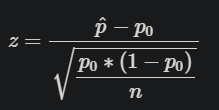

You'll revisit the p-value using this simpler calculation.

late_shipments is available. pandas and numpy are available under their usual aliases, and norm is loaded from scipy.stats.

Instructions 1/3

Hypothesize that the proportion of late shipments is 6%.

Calculate the sample proportion of shipments where late equals "Yes".

Calculate the number of observations in the sample.

In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

Calculate the numerator and denominator of the z-score.

Calculate the z-score as the ratio of these numbers.

In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Print the result
print(z_score)

Transform the z-score into a p-value, remembering that this is a "greater than" alternative hypothesis.

In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

Note: While bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

Test of two proportions
-
You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

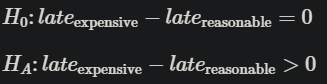

p_hats contains the estimates of population proportions (sample proportions) for each freight_cost_group:

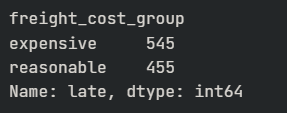

ns contains the sample sizes for these groups:
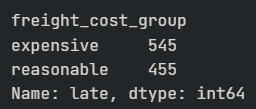

pandas and numpy have been imported under their usual aliases, and norm is available from scipy.stats.

Instructions 1/4

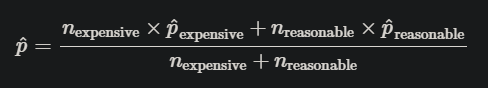

In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Print the result
print(p_hat)

Calculate the standard error of the sample using this equation.

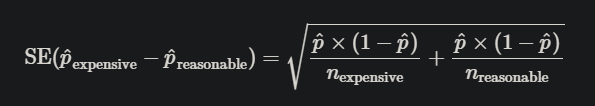

Calculate p_hat multiplied by (1 - p_hat).

Divide p_hat_times_not_p_hat by the number of "reasonable" rows and by the number of "expensive" rows, and sum those two values.

Calculate std_error by taking the square root of p_hat_times_not_p_hat_over_ns.

In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

Calculate the z-score using the following equation.

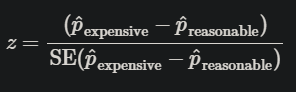

In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Print z_score
print(z_score)

Calculate the p-value from the z-score.

In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

Note:
-
 You can calculate a p-value for a two sample proportion test using (a rather exhausting amount of) arithmetic. This tiny p-value leads us to suspect there is a larger proportion of late shipments for expensive freight compared to reasonable freight.

proportions_ztest() for two samples
-
That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

Recall the hypotheses.

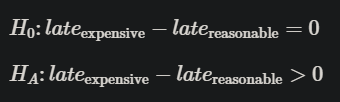

late_shipments is available, containing the freight_cost_group column. numpy and pandas have been loaded under their standard aliases, and proportions_ztest has been loaded from statsmodels.stats.proportion.

Instructions 1/2

Get the counts of the late column grouped by freight_cost_group.

In [ ]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_group")['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

Extract the number of "Yes"'s for the two freight_cost_group into a numpy array, specifying the 'expensive' count and then 'reasonable'.

Determine the overall number of rows in each freight_cost_group as a numpy array, specifying the 'expensive' count and then 'reasonable'.

Run a z-test using proportions_ztest(), specifying alternative as "larger".

In [ ]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_group")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([45 + 500, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
                                  alternative="larger")

# Print the results
print(stat, p_value)

The chi-square distribution
-
Chi-square hypothesis tests rely on the chi-square distribution. Like the t-distribution, it has degrees of freedom and non-centrality parameters.

The plots show the PDF and CDF for a chi-square distribution (solid black line), and for comparison show a normal distribution with the same mean and variance (gray dotted line).

Which statement about the chi-square distribution is true?

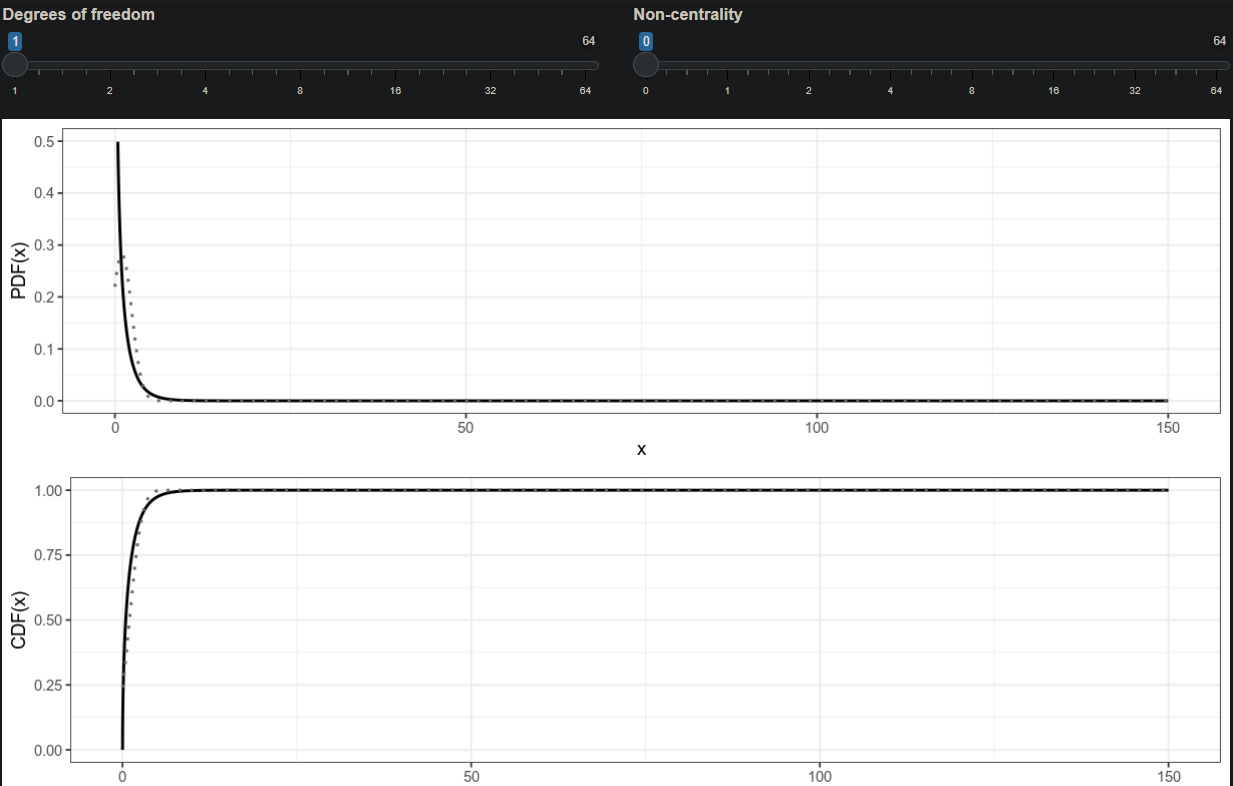

As you increase the degrees of freedom or the non-centrality, the chi-square distribution PDF and CDF curves get closer to those of a normal distribution.

How many tails for chi-square tests?
-
Unlike pingouin.ttest() and statsmodels.stats.proportion.proportions_ztest(), pingouin.chi2_independence() does not have an alternative argument to specify which tails are considered by the alternative hypothesis.

Which tail is almost always considered in chi-square tests?

Right Tailed

 The chi-square test statistic is a square number, so it is always non-negative, so only the right tail tends to be of interest.

Performing a chi-square test
-
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

EXW: "Ex works". The buyer pays for transportation of the goods.

CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.

DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.

FCA: "Free carrier". The seller pays for transportation of the goods.

Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

: vendor_inco_term and freight_cost_group are independent.

: vendor_inco_term and freight_cost_group are associated.

late_shipments is available, and the following have been loaded: matplotlib.pyplot as plt, pandas as pd, and pingouin.

Instructions 1/5

Calculate the proportion of freight_cost_group in late_shipments grouped by vendor_inco_term.

In [ ]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Print props
print(props)

Unstack the .value_counts() result to be in wide format instead of long.

In [ ]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

Create a proportional stacked bar plot with bars filled based on freight_cost_group across the levels of vendor_inco_term.

In [ ]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

Perform a chi-square test of independence on freight_cost_group and vendor_inco_term in the late_shipments dataset.

In [ ]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x="vendor_inco_term", y="freight_cost_group")

# Print results
print(stats[stats['test'] == 'pearson']) 

Question

What should you conclude from the hypothesis test?

Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

Visualizing goodness of fit
-
The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

CIP: 0.05

DDP: 0.1

EXW: 0.75

FCA: 0.1

These frequencies are stored in the hypothesized DataFrame.

The incoterm_counts DataFrame stores the .value_counts() of the vendor_inco_term column.

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases.

Instructions 1/4

Find the total number of rows in late_shipments.

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

Add a column named n to the hypothesized DataFrame that is the hypothesized prop column times n_total.

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

Create a bar graph of 'n' versus 'vendor_inco_term' for the incoterm_counts data, specifying a red color.

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")
plt.legend()
plt.show()

Add blue bars to the plot showing the same results from the hypothesized DataFrame, specifying an alpha of 0.5.

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()
plt.show()

Performing a goodness of fit test
-
The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

: The sample matches with the hypothesized distribution.

: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

late_shipments, incoterm_counts, and hypothesized from the last exercise are available. chisquare from scipy.stats has been loaded.

Instructions 1/2

Using the incoterm_counts and hypothesized datasets, perform a chi-square goodness of fit test on the incoterm counts, n.

In [ ]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], 
                     f_exp=hypothesized['n'])

# Print gof_test results
print(gof_test)

Question

What should you conclude from the hypothesis test?

Fail to reject the null hypothesis and conclude that n follows the distribution specified by hypothesized.